In [1]:
# import packages
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import fiona
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
LEA_gdf = gpd.read_file('Data/Shapefiles/LEA.geojson')
# putting the columns into lower case
LEA_gdf.columns = LEA_gdf.columns.str.lower()

#  selecing relevant columns
LEA_gdf = LEA_gdf[[
#     'le_id', 
                'english', 
#                   'gaeilge', 'contae', # dropping irish names
                'county', 
#                 'province', 
#                 'guid', 
#                 'centroid_x', 
#                 'centroid_y', 
#                 'area', 
#                 'objectid', 
#                 'shape__area',
#                 'shape__length',
    
                'geometry']]

# renaming columns
LEA_gdf = LEA_gdf.rename(columns={"english":"lea"})

LEA_gdf.head(1).transpose()

,0
lea,RATOATH LEA-7
county,MEATH
geometry,"POLYGON ((-6.6982637900429 53.4822365165074, -..."


In [3]:
# cleaning values in lea
# removing numbers from value
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-1', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-2', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-3', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-4', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-5', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-6', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-7', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-8', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-9', '')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('DÚN LAOGHAIRE LEA', 'DUN LAOGHAIRE LEA')
LEA_gdf['lea'] = LEA_gdf['lea'].str.replace('-9', '')
# replacing ' - ' with '-' 
LEA_gdf['lea']= LEA_gdf['lea'].str.replace(" - ","-")

# examining unique values in Local Electoral Area
LEA_gdf['lea'].unique()

array(['RATOATH LEA', 'ROSCREA-TEMPLEMORE LEA', 'TULLAMORE LEA',
       'TUAM LEA', 'BORRIS-IN-OSSORY -MOUNTMELLICK LEA', 'KINNEGAD LEA',
       'DONAGHMEDE LEA', 'MILFORD LEA', 'GALWAY CITY EAST LEA',
       'BALLYBAY-CLONES LEA', 'CLANE LEA', 'CAVAN-BELTURBET LEA',
       'TALLAGHT CENTRAL LEA', 'MOATE LEA', 'NENAGH LEA',
       'DUNDALK-CARLINGFORD LEA', 'BALLYFERMOT-DRIMNAGH LEA',
       'DUNDRUM LEA', 'HOWTH-MALAHIDE LEA', 'PALMERSTOWN-FONTHILL LEA',
       'WATERFORD CITY SOUTH LEA', 'ARDEE LEA', 'DROGHEDA RURAL LEA',
       'MANORHAMILTON LEA', 'WICKLOW LEA', 'ASHBOURNE LEA',
       'MONAGHAN LEA', 'GRAIGUECULLEN -PORTARLINGTON-LEA',
       'CASHEL-TIPPERARY LEA', 'BALTINGLASS LEA',
       'BLANCHARDSTOWN-MULHUDDART LEA', 'STILLORGAN LEA',
       'SOUTH EAST INNER CITY LEA', 'CARLOW LEA', 'KANTURK LEA',
       'PILTOWN LEA', 'NORTH INNER CITY LEA', 'BELMULLET-LEA',
       'SOUTH WEST INNER CITY LEA', 'CARRIGALINE LEA', 'CASTLECOMER LEA',
       'RUSH-LUSK LEA', 'CLAREMORRIS LEA'

<AxesSubplot:>

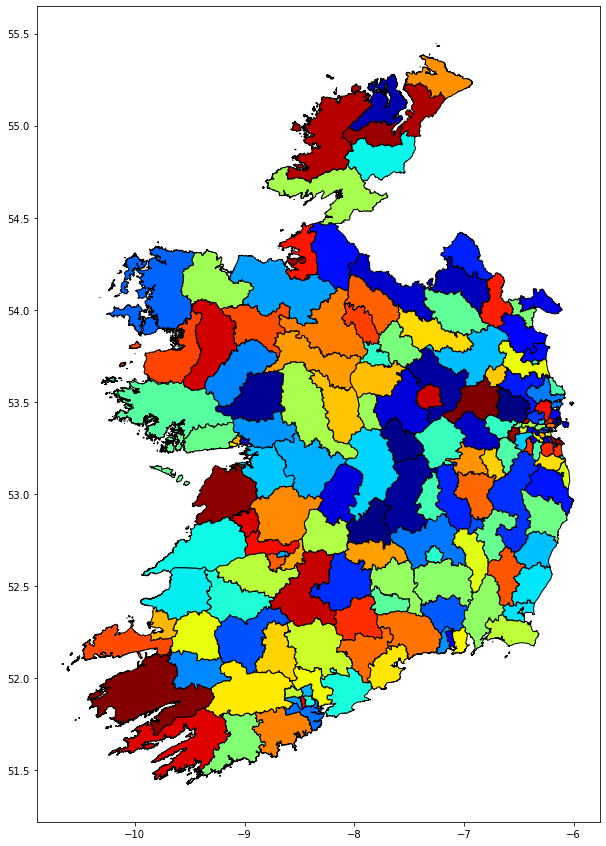

In [4]:
fig,ax = plt.subplots(figsize = (15,15))
LEA_gdf.plot(ax = ax, cmap = 'jet', edgecolor = 'black')

In [5]:
area_LEA_gdf = LEA_gdf.to_crs({'init' :'epsg:2157'}) 
area_LEA_gdf

C:\Users\Karina\miniconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,lea,county,geometry
0,RATOATH LEA,MEATH,"POLYGON ((686400.367 748812.215, 686381.297 74..."
1,ROSCREA-TEMPLEMORE LEA,TIPPERARY,"POLYGON ((610097.936 666496.836, 609804.605 66..."
2,TULLAMORE LEA,OFFALY,"POLYGON ((631152.046 731475.044, 631216.643 73..."
3,TUAM LEA,GALWAY,"POLYGON ((556036.305 752378.793, 555938.809 75..."
4,BORRIS-IN-OSSORY -MOUNTMELLICK LEA,LAOIS,"POLYGON ((639135.247 692044.114, 639050.304 69..."
...,...,...,...
161,LETTERKENNY LEA,DONEGAL,"POLYGON ((615342.081 918439.726, 615612.544 91..."
162,CELBRIDGE LEA,KILDARE,"POLYGON ((696180.284 735716.726, 696512.543 73..."
163,ENNISTIMON LEA,CLARE,"MULTIPOLYGON (((509645.540 703796.549, 509847...."
164,KENMARE LEA,KERRY,"MULTIPOLYGON (((487353.977 583578.480, 487109...."


##### Area LEA

In [6]:
for i in range(len(area_LEA_gdf)):
    area_LEA_gdf.loc[i,'area_in_m2'] = shape(area_LEA_gdf.loc[i,'geometry']).area
    
area_LEA_gdf['area_in_km2'] = area_LEA_gdf['area_in_m2'] /1000000

LEA_gdf['area_in_km2_lea'] = area_LEA_gdf['area_in_km2']

### Save

In [7]:
LEA_gdf.to_file('Data/Shapefiles/clean_LEA.geojson', index=False)